## Exploring and Pre-processing a Dataset using Pandas

### The Dataset: Immigration to Canada from 1980 to 2013 <a id="1"></a>

Dataset Source: [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows).

 download Dataset from  <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx">here</a>.

## *pandas* Basics<a id="2"></a>

The first thing we'll do is install **openpyxl**, a module that *pandas* requires to read Excel files.


In [9]:
!mamba install openpyxl==3.0.9 -y

'mamba' is not recognized as an internal or external command,
operable program or batch file.


Next, we'll do is import two key data analysis modules: *pandas* and *numpy*.

In [10]:
import numpy as np
import pandas as pd

## Read Data

In [11]:
file_path = 'Canada.xlsx'
df_can = pd.read_excel(
    file_path,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data read into a dataframe!')


Data read into a dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [12]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


## Inspect data

In [13]:
df_can.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


list of column headers in your Datafram

In [14]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

To view the dimensions of the dataframe

In [15]:
#(rows,columns)
df_can.shape

(195, 43)

## Clean Data
* remove unnecessary columns
* rename columns for clarity
* Add a column with total immigration (summing immigration over the years for each country (row))

* axis=1: This specifies that you want to drop columns (not rows)
* inplace=True: When inplace is set to True, it means that the operation is performed on the DataFrame itself, and it modifies the DataFrame in place. So, in this case.
* After executing this line of code, the columns 'AREA', 'REG', 'DEV', 'Type', and 'Coverage' will be removed from the df_can DataFrame, and df_can will now contain only the remaining columns.

In [16]:
#remove unnecessary columns
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [17]:
#rename columns for clarity
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'},inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [22]:
#Add a column with total immigration (summing immigration over the years for each country (row))
df_can['Total']=df_can.sum(axis=1)
df_can['Total']

C:\Users\alimo\AppData\Local\Temp\ipykernel_22716\35948029.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total']=df_can.sum(axis=1)


0      58639
1      15699
2      69439
3          6
4         15
       ...  
190    97146
191        2
192     2985
193     1677
194     8598
Name: Total, Length: 195, dtype: int64

check null values in datafram

In [23]:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [24]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


## Creating Line Plot

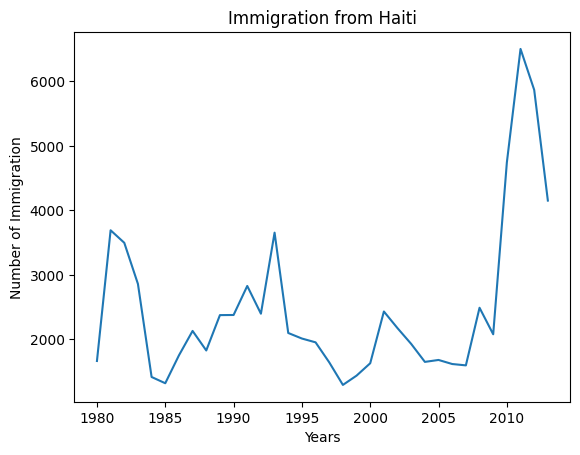

In [39]:
import matplotlib.pyplot as plt
years = list(map(str, range(1980, 2014)))
df_can.loc['Haiti',years].plot(kind='line')
plt.title('Immigration from Haiti')
plt.xlabel('Years')
plt.ylabel('Number of Immigration') 
plt.show()

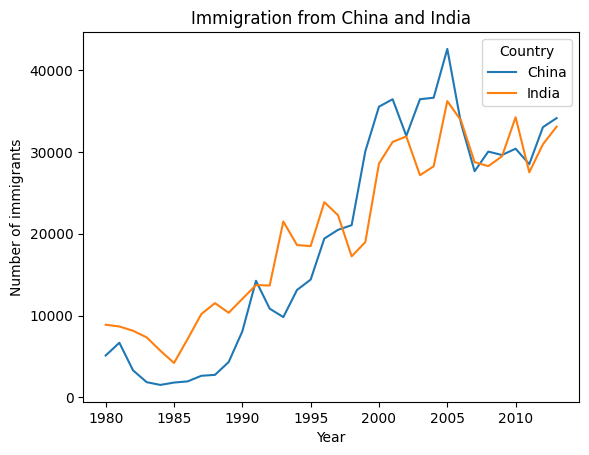

In [40]:
df_CI = df_can.loc[['China','India'],years]

df_CI = df_CI.transpose()
#df_CI.head()

# Convert years (indices) to int type from string
df_CI.index = df_CI.index.map(int)
df_CI.plot(kind = 'line')
plt.title('Immigration from China and India')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')
plt.show()